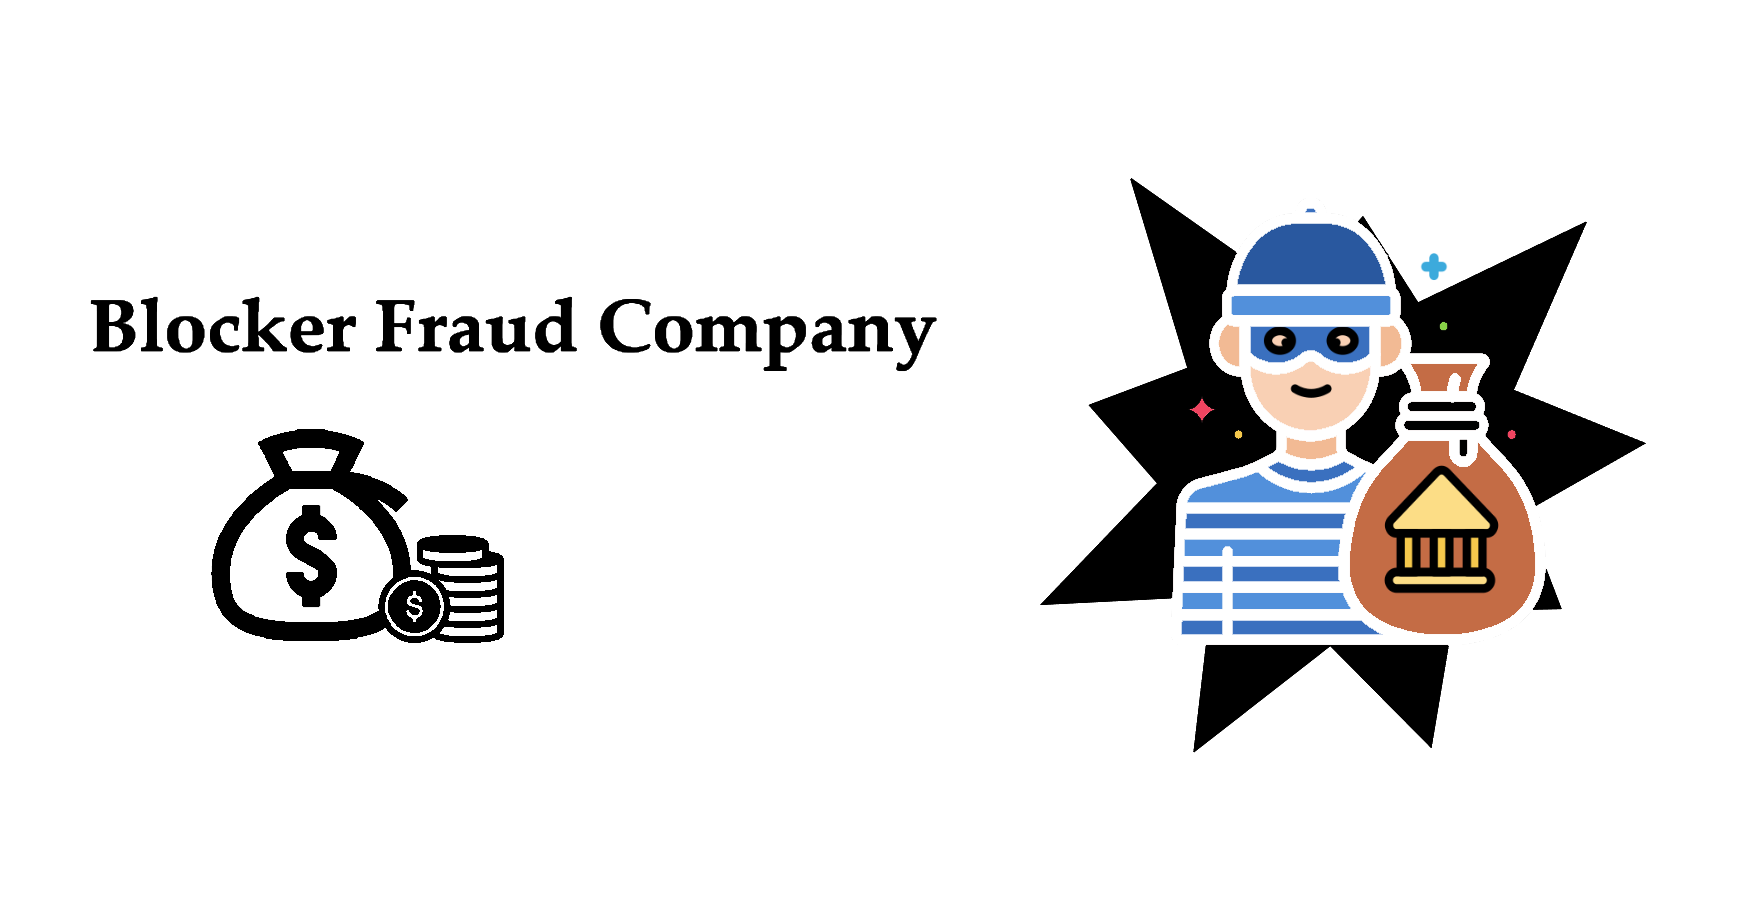

<p style="text-align:center;"><i>"Blocker Fraude Company is a company specialized in fraud detection in financial transactions made through mobile devices. The company has a service called “Blocker Fraud” with no guarantee of blocking fraudulent transactions."</i></p>

**Bussiness Model**

The company's business model is of the service type with monetization made by the provider's performance, that is, the user pays a fixed fee on the success in the detection of service fraud of the customer's transactions. For get new clients the blocker fraud start using a new method of services:

1. The company will receive 25% of the value of each transaction that is truly detected as fraud.
2. The company will receive 5% of the value of each transaction detected as fraud, however the transaction is truly legitimate.
3. The company will refund 100% of the value to the customer, for each transaction detected as legitimate, however the transaction is truly a fraud.

**What is a Fraud ?**

Fraud is an intentionally deceptive action designed to provide the perpetrator with an unlawful gain or to deny a right to a victim. In addition, it is a deliberate act (or failure to act) with the intention of obtaining an unauthorized benefit, either for oneself or for the institution, by using deception or false suggestions or suppression of truth or other unethical means, which are believed and relied upon by others. Depriving another person or the institution of a benefit to which he/she/it is entitled by using any of the means described above also constitutes fraud.

### 0.1. Imports

In [43]:
import numpy as np
import seaborn as sns
import pyspark.pandas as ps
import matplotlib.pyplot as plt

from inflection import underscore

### 0.2. Aux Functions

### 0.3. Load Dataset 

In [3]:
df = ps.read_csv('../data/data.csv')

# 1.0. Descriptive Statistical

## 1.1. Rename Columns

In [4]:
df.columns = [underscore(k) for k in df.columns.tolist()]

## 1.2. Dataset Dimension

In [10]:
print(f'Number of Columns: {df.shape[1]}\nNumber of Rows: {df.shape[0]}')

Number of Columns: 11
Number of Rows: 6362620


## 1.3. Change Data Types

In [15]:
df.dtypes

step                  int32
type                 object
amount              float64
name_orig            object
oldbalance_org      float64
newbalance_orig     float64
name_dest            object
oldbalance_dest     float64
newbalance_dest     float64
is_fraud              int32
is_flagged_fraud      int32
dtype: object

## 1.4. Check NaN

In [18]:
df.loc[df.isna()]

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud


## 1.5. Fillout NaN

Do not have Missing Values

## 1.6. Change Data Types

Do not need change data types.

## 1.7. Descriptive Statistical

### 1.7.1. Numerical Attributes

In [5]:
num_att = df.select_dtypes(include=['int32', 'float64'])
cat_att = df.select_dtypes(include=['object'])

In [6]:
num_att.describe()

,step,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338855e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.486438e+04,1.421000e+04,0.000000e+00,1.326987e+05,2.146195e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087067e+05,1.072940e+05,1.442376e+05,9.429421e+05,1.111661e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### 1.7.2. Categorical Attributes

In [17]:
cat_values = [cat_att[k].value_counts().to_dict() for k in cat_att.columns.tolist()]

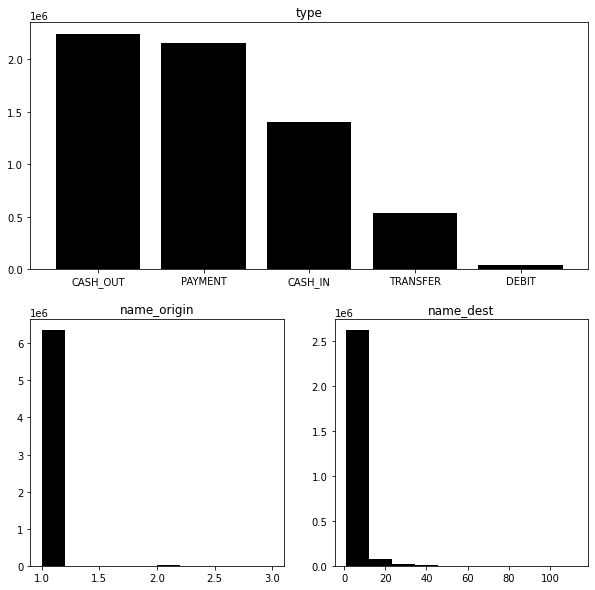

In [67]:
_, _, = plt.subplots(figsize=(10,10))
ax0 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax1 = plt.subplot2grid((2, 2), (1, 0))
ax2 = plt.subplot2grid((2, 2), (1, 1))

ax0.bar(cat_values[0].keys(), cat_values[0].values(), color='k')
ax1.hist(cat_values[1].values(), bins=10, color='k')
ax2.hist(cat_values[2].values(), bins=10, color='k')
ax0.set_title('type')
ax1.set_title('name_origin')
ax2.set_title('name_dest');